In [52]:
import nltk
from nltk.corpus import gutenberg as gu
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from matplotlib.colors import ListedColormap
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

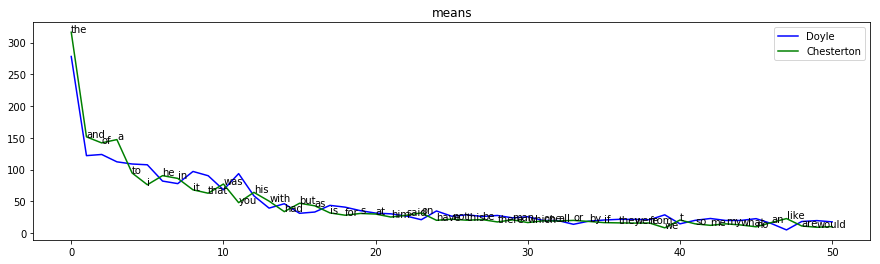

In [138]:
# Sherlock file open
# with open("./nltk_data/Sherlock.txt", "r", encoding='utf8') as f:
#     sherlock = f.read()
    
# PlaintextCorpusReader로 Sherlock corpus 생성
slc = PlaintextCorpusReader("./nltk_data/",'.*')

# 문장기호(punctuation) 제거
slw = [w.lower() for w in slc.words('Sherlock.txt') if w[0].isalpha()]
cbw = [w.lower() for w in gu.words('chesterton-brown.txt') if w[0].isalpha()]

# 많이 쓰인 상위 50개 단어 추출해서 top50 변수에 저장
total = slw + cbw
fdist = nltk.FreqDist(total)
top50 = [w[0] for w in fdist.most_common()[:51]]

# 각 작가별로 top50에 해당하는 단어가 작품에 몇 개나 나오는지 세서 M에 저장한다  
M = []

for corp in [slw, cbw]:
    for i in range(int(len(corp)/5000)):
        words = [w for w in corp[5000*i:5000*(i+1)] if w in top50]
        fdist = nltk.FreqDist(words)
        M.append([fdist[w] for w in top50])    

# 단어 평균 빈도 그래프
plt.figure(figsize=(15,4))
plt.plot(np.mean(M[:12],axis=0),'b')
plt.plot(np.mean(M[12:],axis=0),'g')

for i in range(50): 
    plt.text(i,np.mean(M[12:],axis=0)[i],top50[i])

plt.legend(['Doyle', 'Chesterton'])
plt.title('means')
plt.show()

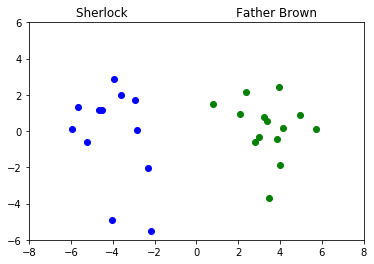

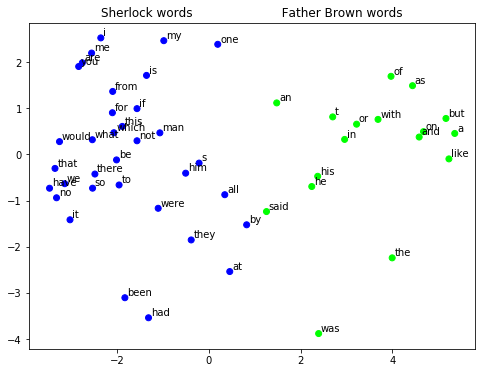

In [144]:
# 표준화(Normalize)
M = np.array(M)
M = M - np.mean(M, axis = 0)[None, :] # 컬럼별 mean, 즉 단어별 평균 빈도
M = M / np.std(M, axis = 0) # 단어별 표준 점수화
M = M - np.mean(M, axis = 1)[:, None] # word block 별 평균 표준 점수를 구해서 빼준다(표준화?) 

# SVD 수행
U, S, Vt = la.svd(M, full_matrices=False)

Matrix_S = np.eye(len(S))*S

# U, S의 dot product 수행
US = np.dot(U,Matrix_S)

# 문서 분포 그래프 
plt.plot(US[:12,0],US[:12,1],'ob')
plt.plot(US[12:,0],US[12:,1],'og')
plt.xlim(-8,8)
plt.ylim(-6,6)

plt.title('Sherlock                            Father Brown')

# Vt를 transpose 해서 S와 dot product 수행 
VS = np.dot(np.transpose(Vt), Matrix_S)


# 단어 분포 그래프
cmap_light = ListedColormap(['#0000FF', '#00FF00'])

plt.figure(figsize=(8,6))
plt.scatter(VS[:,0], VS[:,1], c=VS[:,0], cmap = cmap_light)    

for k in range(len(top50)): 
    plt.text(VS[k][0]+.05,VS[k][1]+.05,top50[k])
plt.title('Sherlock words                       Father Brown words')
plt.show()

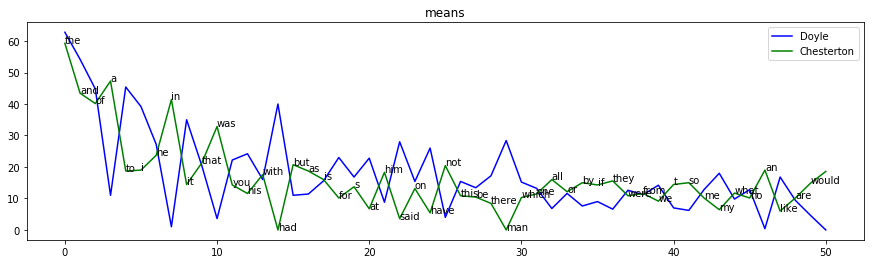

In [142]:

# ------------------------
#
## REMOVE STOPWORDS
#
# ------------------------


# 영어 stopword 가져오기 
stop = nltk.corpus.stopwords.words('english')


# 문장기호 제거
slw_clean = [w.lower() for w in slc.words('Sherlock.txt') if (w[0].isalpha()) and (w.lower() not in stop)]
cbw_clean = [w.lower() for w in gu.words('chesterton-brown.txt') if w[0].isalpha() and w.lower() not in stop]


# 많이 쓰인 상위 50개 단어 추출해서 top50_clean 변수에 저장
total_clean = slw_clean + cbw_clean
fdist_clean = nltk.FreqDist(total_clean)
top50_clean = [w[0] for w in fdist_clean.most_common()[:51]]


# 5000단어씩 자름
M_clean = []

for corp in [slw_clean, cbw_clean]:
    for i in range(int(len(corp)/5000)):
        words = [w for w in corp[5000*i:5000*(i+1)] if w in top50_clean]
        fdist_clean = nltk.FreqDist(words)
        M_clean.append([fdist_clean[w] for w in top50_clean])

        
# 단어 평균 빈도 그래프
plt.figure(figsize=(15,4))
plt.plot(np.mean(M_clean[:5],axis=0),'b')
plt.plot(np.mean(M_clean[5:],axis=0),'g')

for i in range(50): 
    plt.text(i,np.mean(M_clean[5:],axis=0)[i],top50[i])

plt.legend(['Doyle', 'Chesterton'])
plt.title('means')
plt.show()

Text(0.5,1,'Sherlock words                       Father Brown words')

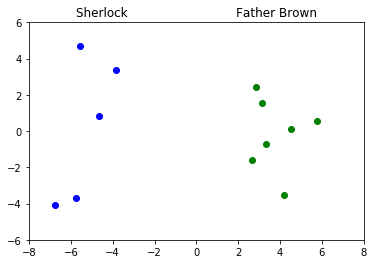

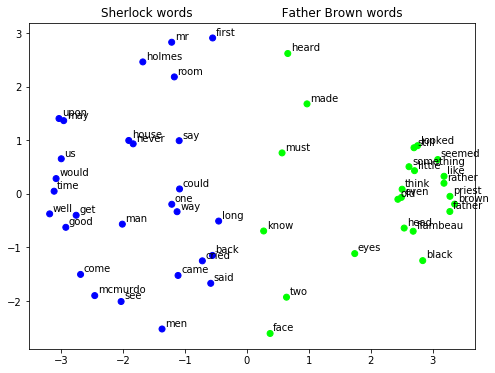

In [146]:
# 표준화
M_clean = np.array(M_clean)
M_clean = M_clean - np.mean(M_clean, axis = 0)[None, :] # 컬럼별 mean, 즉 단어별 평균 빈도
M_clean = M_clean / np.std(M_clean, axis = 0) # 단어별 표준 점수화

M_clean = M_clean - np.mean(M_clean, axis = 1)[:, None] # word block 별 평균 표준 점수를 구해서 빼준다(표준화?) 


#SVD 수행
U_c, S_c, Vt_c = la.svd(M_clean, full_matrices=False)

Matrix_S_c = np.eye(len(S_c))*S_c

# U_c, S_c의 dot product 수행
US_c = np.dot(U_c, Matrix_S_c)

# Vt_c를 transpose 해서 S_c와 dot product 수행 
VS_c = np.dot(np.transpose(Vt_c),Matrix_S_c)

# 문서 분포 그래프
plt.plot(US_c[:5,0],US_c[:5,1],'ob')
plt.plot(US_c[5:,0],US_c[5:,1],'og')
plt.xlim(-8,8)
plt.ylim(-6,6)

plt.title('Sherlock                            Father Brown')


# 단어 분포 그래프
cmap_light = ListedColormap(['#0000FF', '#00FF00'])

plt.figure(figsize=(8,6))
plt.scatter(VS_c[:,0], VS_c[:,1], c=VS_c[:,0], cmap = cmap_light)    
for k in range(len(top50_clean)): 
    plt.text(VS_c[k][0]+.05,VS_c[k][1]+.05,top50_clean[k])
plt.title('Sherlock words                       Father Brown words')